In [2]:
import pandas as pd
import numpy as np

kepler = pd.read_csv("datasets\\Kepler\\cumulative.csv")
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
confirmed = np.array(kepler["koi_disposition"] == "CONFIRMED")
no_cat = kepler.drop(columns=["rowid", "koi_score", 'kepid','kepoi_name','kepler_name','koi_disposition','koi_pdisposition','koi_tce_delivname'], axis=1)
no_cat["confirmed"] = confirmed*1
no_cat.columns

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1',
       'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'confirmed'],
      dtype='object')

In [22]:
remove = [c for c in no_cat.columns if "err" not in c]
no_cat = no_cat[remove]
#for i in range(len(columns)):
  #  no_cat[columns[i]] = new_data[i]

no_cat
c_m = no_cat.corr()
c_m["confirmed"].sort_values(ascending=False)

confirmed           1.000000
koi_tce_plnt_num    0.179302
koi_slogg           0.133942
dec                 0.086639
koi_kepmag          0.029368
koi_prad           -0.018719
koi_period         -0.020452
koi_insol          -0.026674
koi_impact         -0.053034
koi_srad           -0.062248
koi_time0bk        -0.073760
koi_duration       -0.113940
koi_model_snr      -0.124472
ra                 -0.131990
koi_depth          -0.158632
koi_steff          -0.165421
koi_teq            -0.165640
koi_fpflag_ec      -0.206653
koi_fpflag_nt      -0.257237
koi_fpflag_co      -0.272591
koi_fpflag_ss      -0.293209
Name: confirmed, dtype: float64

In [23]:
vals = c_m["confirmed"].sort_values(ascending=False)
better_corr = [f'{val}' for val in vals.keys() if abs(vals[val]) >= 0.05]
print(better_corr)

final_cols = no_cat[better_corr]
final_cols

['confirmed', 'koi_tce_plnt_num', 'koi_slogg', 'dec', 'koi_impact', 'koi_srad', 'koi_time0bk', 'koi_duration', 'koi_model_snr', 'ra', 'koi_depth', 'koi_steff', 'koi_teq', 'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ss']


,confirmed,koi_tce_plnt_num,koi_slogg,dec,koi_impact,koi_srad,koi_time0bk,koi_duration,koi_model_snr,ra,koi_depth,koi_steff,koi_teq,koi_fpflag_ec,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss
0,1,1.0,4.467,48.141651,0.146,0.927,170.538750,2.95750,35.8,291.93423,615.8,5455.0,793.0,0,0,0,0
1,1,2.0,4.467,48.141651,0.586,0.927,162.513840,4.50700,25.8,291.93423,874.8,5455.0,443.0,0,0,0,0
2,0,1.0,4.544,48.134129,0.969,0.868,175.850252,1.78220,76.3,297.00482,10829.0,5853.0,638.0,0,0,0,1
3,0,1.0,4.564,48.285210,1.276,0.791,170.307565,2.40641,505.6,285.53461,8079.2,5805.0,1395.0,0,0,0,1
4,1,1.0,4.438,48.226200,0.701,1.046,171.595550,1.65450,40.9,288.75488,603.3,6031.0,1406.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0,1.0,4.296,46.973351,0.765,1.088,132.016100,4.80600,8.4,298.74921,87.7,5638.0,929.0,1,0,0,0
9560,0,1.0,4.529,47.093819,1.252,0.903,131.705093,3.22210,453.3,297.18875,1579.2,5638.0,2088.0,0,0,1,1
9561,0,1.0,4.444,47.163219,0.043,1.031,133.001270,3.11400,10.6,286.50937,48.5,6119.0,1608.0,0,0,0,0
9562,0,1.0,4.447,47.176281,0.147,1.041,132.181750,0.86500,12.3,294.16489,103.6,6173.0,2218.0,0,0,1,0


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [25]:
data = final_cols.dropna(axis=0)
#y = data['confirmed']
#X = data.drop(['confirmed'], axis=1)
pipe = make_pipeline(PCA(), Normalizer(), StandardScaler())


In [41]:
train_set, test_set = train_test_split(data, test_size=1000, random_state=42) 
x_train = train_set.drop("confirmed", axis=1)
y_train = train_set["confirmed"]
x_test = test_set.drop("confirmed", axis=1)
y_test = test_set["confirmed"]

In [42]:
x_train = pipe.fit_transform(x_train)
x_test = pipe.fit_transform(x_test)


In [43]:
last_train = x_train[:6000]
last_test = x_test[:6000]
x_valid = x_train[6000:]
y_valid = y_train[6000:]
y_train = y_train[:6000]


In [50]:
import tensorflow as tf
from tensorflow import keras

In [161]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [162]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [163]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [164]:
history = model.fit(last_train, y_train, epochs=30,
                    validation_data=(last_test, y_test))

Epoch 1/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 1.0815 - val_accuracy: 0.7760 - val_loss: 0.4446
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.4009 - val_accuracy: 0.8010 - val_loss: 0.3769
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.3525 - val_accuracy: 0.8010 - val_loss: 0.3650
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8317 - loss: 0.3375 - val_accuracy: 0.8020 - val_loss: 0.3596
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8278 - loss: 0.3307 - val_accuracy: 0.8040 - val_loss: 0.3612
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.3382 - val_accuracy: 0.8000 - val_loss: 0.3668
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3090 - val_accuracy: 0.8040 - val_loss: 0.3695
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.3170 - val_accuracy: 0.

In [76]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 300)            │         6,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,412 (146.14 KB)

 Trainable params: 37,410 (146.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [77]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 249}

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

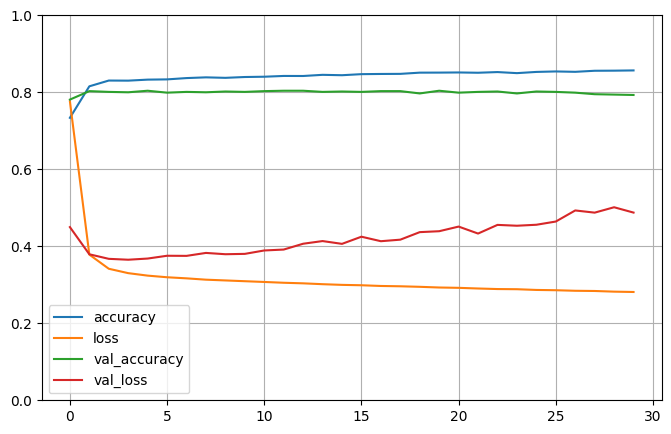

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Just testing

In [80]:
model2 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

Tried having only 1 neuron for the softmax layer, and obviously that didn't work because it needs at least two neurons for both 0 and 1. (True or False)

In [81]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["Accuracy"])

In [82]:
test2 = model2.fit(last_train, y_train, epochs=30,
                    validation_data=(last_test, y_test))

Epoch 1/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.7493 - loss: 0.4992 - val_Accuracy: 0.7650 - val_loss: 0.4025
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8026 - loss: 0.3682 - val_Accuracy: 0.7990 - val_loss: 0.3616
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8278 - loss: 0.3362 - val_Accuracy: 0.7990 - val_loss: 0.3567
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8302 - loss: 0.3183 - val_Accuracy: 0.8010 - val_loss: 0.3588
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8268 - loss: 0.3258 - val_Accuracy: 0.8020 - val_loss: 0.3665
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8468 - loss: 0.3034 - val_Accuracy: 0.8010 - val_loss: 0.3717
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8451 - loss: 0.3060 - val_Accuracy: 0.8030 - val_loss: 0.3707
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8395 - loss: 0.3078 - val_Accuracy: 0.

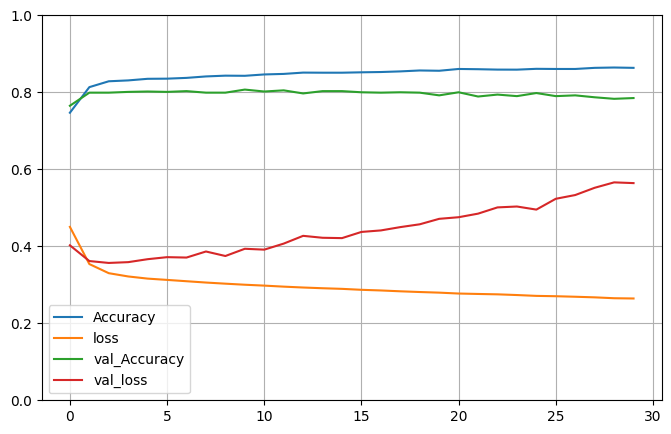

In [83]:
pd.DataFrame(test2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [84]:
model3 = keras.models.Sequential([
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(2, activation="softmax")
])


In [85]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["Accuracy"])

In [86]:
test2 = model3.fit(last_train, y_train, epochs=30,
                    validation_data=(last_test, y_test))

Epoch 1/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.5876 - loss: 0.8057 - val_Accuracy: 0.7300 - val_loss: 0.5758
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7389 - loss: 0.5230 - val_Accuracy: 0.7580 - val_loss: 0.5212
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7782 - loss: 0.4625 - val_Accuracy: 0.7790 - val_loss: 0.4851
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7937 - loss: 0.4258 - val_Accuracy: 0.7790 - val_loss: 0.4658
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8009 - loss: 0.4086 - val_Accuracy: 0.7870 - val_loss: 0.4490
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8010 - loss: 0.4018 - val_Accuracy: 0.7810 - val_loss: 0.4357
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8075 - loss: 0.3801 - val_Accuracy: 0.7880 - val_loss: 0.4281
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8115 - loss: 0.3788 - val_Accuracy: 0.

In [14]:
from sklearn.metrics import precision_score, recall_score

In [89]:
model4 = keras.models.Sequential()
for n_hidden in (300, 100, 50, 50, 50):
    model4.add(keras.layers.Dense(n_hidden, activation="relu"))
model4.add(keras.layers.Dense(1, activation="sigmoid"))

In [90]:
model4.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["Accuracy"])

In [91]:
test2 = model4.fit(last_train, y_train, epochs=20,
                    validation_data=(last_test, y_test))

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.7753 - loss: 0.4211 - val_Accuracy: 0.7920 - val_loss: 0.3704
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8302 - loss: 0.3312 - val_Accuracy: 0.7960 - val_loss: 0.3950
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8348 - loss: 0.3260 - val_Accuracy: 0.7860 - val_loss: 0.4258
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8467 - loss: 0.2962 - val_Accuracy: 0.7890 - val_loss: 0.4399
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8445 - loss: 0.2904 - val_Accuracy: 0.7870 - val_loss: 0.5073
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8494 - loss: 0.2832 - val_Accuracy: 0.7820 - val_loss: 0.5395
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8541 - loss: 0.2815 - val_Accuracy: 0.7830 - val_loss: 0.5591
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8699 - loss: 0.2624 - val_Accuracy: 0.

In [94]:
preds = model4.predict(last_test)
preds

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[8.72919429e-03],
       [1.00940611e-04],
       [7.84500880e-05],
       [1.21706985e-02],
       [9.17365105e-06],
       [1.53775671e-02],
       [1.91714428e-03],
       [6.37498684e-04],
       [8.77702022e-10],
       [1.37696636e-03],
       [8.71609314e-04],
       [8.92511189e-01],
       [4.39211167e-02],
       [9.97671247e-01],
       [2.66213261e-04],
       [2.93384016e-01],
       [5.23609087e-05],
       [2.62459014e-02],
       [4.59966286e-05],
       [1.01587968e-02],
       [3.59259707e-06],
       [7.54539447e-04],
       [7.18986732e-04],
       [5.03029441e-03],
       [8.59711145e-04],
       [4.95708719e-08],
       [1.57602767e-06],
       [6.71346858e-03],
       [1.40819327e-06],
       [3.62578989e-03],
       [2.72706842e-07],
       [2.25996104e-04],
       [4.08255965e-01],
       [3.01694177e-04],
       [2.75176554e-03],
       [2.63629103e-04],
       [1.31465429e-02],
       [2.12839514e-01],
       [2.98008992e-04],
       [9.90431872e-04],


In [95]:
model5 = keras.models.Sequential()
for n_hidden in (300, 200, 100, 50, 10):
    model5.add(keras.layers.Dense(n_hidden, activation="relu"))
model5.add(keras.layers.Dense(1, activation="sigmoid"))

struggled trying to get this for-loop to work properly wit the different layers at the very end (sigmoid vs softmax)

ex: All layers added to a Sequential model should have unique names. Name 'dense' is already the name of a layer in this model. Update the `name` argument to pass a unique name

Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)
 -> had to change to sparse_categorical_crossentropy instead of binary crossentropy.

In [96]:
for optimizer in ("sgd", "rmsprop", "adam", "adamax", "nadam"):
    for pair in ([keras.layers.Dense(1, activation="sigmoid", name="sigmoid"), "binary_crossentropy"], [keras.layers.Dense(2, activation="softmax"), "sparse_categorical_crossentropy"]):
        keras.backend.clear_session()
        model5 = keras.models.Sequential()
        for n_hidden in (300, 200, 100, 50, 10):
            model5.add(keras.layers.Dense(n_hidden, activation="relu"))
        model5.add(pair[0])
        model5.compile(loss=pair[1], optimizer=optimizer, metrics=["accuracy"])
        model5.fit(last_train, y_train, epochs=10,
                    validation_data=(last_test, y_test), verbose=0)
        print(optimizer, pair[1], model5.evaluate(last_test, y_test))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7959 - loss: 0.4166 
sgd binary_crossentropy [0.4239691495895386, 0.7950000166893005]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4323 
sgd sparse_categorical_crossentropy [0.4478074014186859, 0.7900000214576721]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.6850 
rmsprop binary_crossentropy [0.7193277478218079, 0.7860000133514404]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7789 - loss: 0.7284 
rmsprop sparse_categorical_crossentropy [0.7644648551940918, 0.7720000147819519]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7764 - loss: 0.9085 
adam binary_crossentropy [0.925475537776947, 0.7689999938011169]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 0.9316 
adam sparse_categorical_crossentropy [0.9280274510383606, 0.7639999985694885]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.6652 
adamax binary_crossentropy [0.6793785691261292

Best base model:
Adam with binary_crossentropy (accuracy 0.85, loss=0.29)

In [97]:
model6 = keras.models.Sequential()
for n_hidden in (300, 200, 100, 50, 10):
    model6.add(keras.layers.BatchNormalization())
    model6.add(keras.layers.Dense(n_hidden, activation="relu"))
model6.add(keras.layers.Dense(1, activation="sigmoid"))


In [98]:
model6.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["Accuracy"])

In [99]:
test2 = model6.fit(last_train, y_train, epochs=20,
                    validation_data=(last_test, y_test))

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.7764 - loss: 0.4279 - val_Accuracy: 0.7850 - val_loss: 0.3922
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8220 - loss: 0.3199 - val_Accuracy: 0.7940 - val_loss: 0.3817
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8315 - loss: 0.3130 - val_Accuracy: 0.7950 - val_loss: 0.3819
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8338 - loss: 0.3134 - val_Accuracy: 0.8030 - val_loss: 0.4148
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8315 - loss: 0.3059 - val_Accuracy: 0.8000 - val_loss: 0.4077
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8351 - loss: 0.3062 - val_Accuracy: 0.7950 - val_loss: 0.4405
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8492 - loss: 0.2889 - val_Accuracy: 0.8030 - val_loss: 0.4204
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8404 - loss: 0.3044 - val_Accuracy: 0.

In [100]:
train_set2 = train_set.dropna(axis=0)
test_set2 = test_set.dropna(axis=0)
x_train2 = train_set2.drop("confirmed", axis=1)
y_train2 = train_set2["confirmed"]
x_test2 = test_set2.drop("confirmed", axis=1)
y_test2 = test_set2["confirmed"]

In [101]:
train_set2 = pipe.fit_transform(x_train2)
test_set2 = pipe.transform(x_test2)

In [102]:
keras.backend.clear_session()

In [103]:
model6 = keras.models.Sequential()
for n_hidden in (300, 200, 100, 50, 10):
    model6.add(keras.layers.BatchNormalization())
    model6.add(keras.layers.Dense(n_hidden, activation="relu"))
model6.add(keras.layers.Dense(1, activation="sigmoid"))


In [104]:
model6.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["Accuracy"])

In [105]:
test2 = model6.fit(train_set2, y_train2, epochs=20,
                    validation_data=(test_set2, y_test2))

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.7621 - loss: 0.4470 - val_Accuracy: 0.8370 - val_loss: 0.3179
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8268 - loss: 0.3150 - val_Accuracy: 0.8340 - val_loss: 0.3254
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8387 - loss: 0.3079 - val_Accuracy: 0.8330 - val_loss: 0.3135
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8412 - loss: 0.3058 - val_Accuracy: 0.8390 - val_loss: 0.3047
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8408 - loss: 0.3015 - val_Accuracy: 0.8440 - val_loss: 0.3003
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8448 - loss: 0.2981 - val_Accuracy: 0.8410 - val_loss: 0.3110
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8333 - loss: 0.3013 - val_Accuracy: 0.8390 - val_loss: 0.3066
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8392 - loss: 0.2972 - val_Accuracy: 0.

dropping data did NOT help

In [15]:
import keras_tuner as kt

In [107]:
class MyHyperModel(kt.HyperModel):
  def build(self, hp):
    model = keras.Sequential()
    for n_hidden in (512, 256, 128, 64, 16):
      model.add(keras.layers.BatchNormalization())
      model.add(keras.layers.Dense(n_hidden, activation=hp.Choice('activation', ['relu', 'elu', 'selu', 'tanh'])))

    if hp.Boolean("dropout"):
      model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2)

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['precision', 'accuracy'])

    return model

In [109]:
tuner = kt.BayesianOptimization(
    hypermodel=MyHyperModel(),
    objective="val_accuracy",
    max_trials=8,
)

getting KeyError: 'val_accuracy' when trying to run random search?

objective = 'val_accuracy' doesn't work, nor does
objective = kt.Objective("val_accuracy", direction="max")

neither does "accuracy"

finally fixed by adding metrics='accuracy' to model.compile

In [110]:
tuner.search(last_train, y_train, epochs=8, validation_data=(last_test, y_test))

Trial 8 Complete [00h 00m 11s]
val_accuracy: 0.7929999828338623

Best val_accuracy So Far: 0.8029999732971191
Total elapsed time: 00h 01m 21s


In [111]:
best_model = tuner.get_best_models(1)[0]
best_model.summary()

C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,209 (735.19 KB)

 Trainable params: 186,249 (727.54 KB)

 Non-trainable params: 1,960 (7.66 KB)

In [112]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'tanh', 'dropout': True, 'lr': 0.0016169625741817044}

In [113]:
best_model.fit(last_train, y_train, epochs=20, validation_data=(last_test, y_test))

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8314 - loss: 0.3222 - precision: 0.6691 - val_accuracy: 0.7860 - val_loss: 0.4767 - val_precision: 0.5830
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.3338 - precision: 0.6419 - val_accuracy: 0.7460 - val_loss: 0.4930 - val_precision: 0.5018
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8184 - loss: 0.3349 - precision: 0.6447 - val_accuracy: 0.7330 - val_loss: 0.4966 - val_precision: 0.4812
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8252 - loss: 0.3239 - precision: 0.6593 - val_accuracy: 0.7530 - val_loss: 0.5238 - val_precision: 0.5146
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8267 - loss: 0.3200 - precision: 0.6505 - val_accuracy: 0.7500 - val_loss: 0.5134 - val_precision: 0.5095
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8356 - loss: 0.3164 - precision: 0.6721 - val_accuracy: 0.7400 - val_loss:

In [114]:
best_model.evaluate(last_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.5052 - precision: 0.6387 


[0.5053254961967468, 0.601190447807312, 0.7789999842643738]

In [90]:
model_final = keras.Sequential()
for n_hidden in (300, 200):
    #model_final.add(keras.layers.BatchNormalization())
    model_final.add(keras.layers.Dense(n_hidden, activation="relu"))


#model_final.add(keras.layers. BatchNormalization())
model_final.add(keras.layers.Dense(1, activation='sigmoid'))

model_final.compile(loss=keras.losses.BinaryFocalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=['precision'])

In [91]:
test3 = model_final.fit(last_train, y_train, epochs=110, validation_data=(x_valid, y_valid))

Epoch 1/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1060 - precision: 0.5478 - val_loss: 0.0851 - val_precision: 0.6080
Epoch 2/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840 - precision: 0.6398 - val_loss: 0.0828 - val_precision: 0.6654
Epoch 3/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0804 - precision: 0.6513 - val_loss: 0.0825 - val_precision: 0.6568
Epoch 4/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0772 - precision: 0.6731 - val_loss: 0.0841 - val_precision: 0.6984
Epoch 5/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0748 - precision: 0.6761 - val_loss: 0.0811 - val_precision: 0.6270
Epoch 6/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0735 - precision: 0.6825 - val_loss: 0.0812 - val_precision: 0.6679
Epoch 7/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0720 - precision: 0.6792 - val_loss: 0.0810 - val_precision: 0.6654
Epoch 8/110
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0705 - precision: 0.

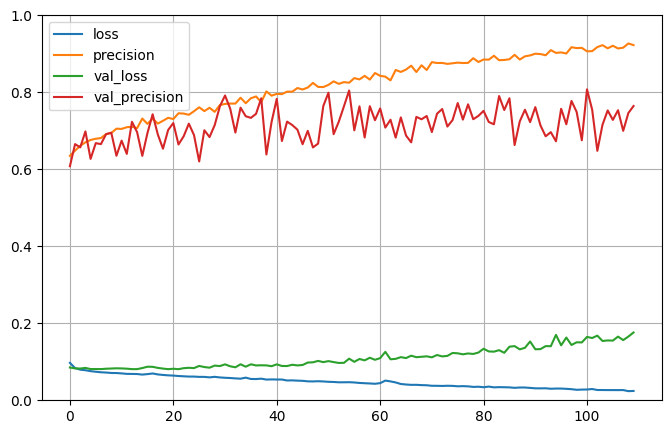

In [92]:
pd.DataFrame(test3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [93]:
model_final.evaluate(last_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6778 - precision: 0.5675


[2.385800838470459, 0.5361445546150208]

In [94]:
model_final.predict(last_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[3.3022922e-18],
       [2.4088539e-10],
       [7.0435004e-25],
       [2.3346242e-15],
       [3.6172131e-11],
       [1.8639997e-07],
       [9.2377013e-23],
       [9.2046749e-15],
       [3.8166570e-22],
       [1.9432463e-08]], dtype=float32)

In [95]:
predicted = np.array([1 if x >= 0.5 else 0 for x in model_final.predict(last_train[:10])])
predicted == y_train[:10].to_numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [96]:
print(model_final.predict(last_train[:10]), y_train[:10].to_numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[7.3576289e-01]
 [1.1787197e-11]
 [8.9828397e-08]
 [2.3773910e-01]
 [8.3488071e-01]
 [3.4939177e-02]
 [5.1157074e-03]
 [9.9716578e-07]
 [9.9999994e-01]
 [6.2232059e-03]] [1 0 0 0 1 0 0 0 1 0]


In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [98]:
predicted = model_final.predict(last_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


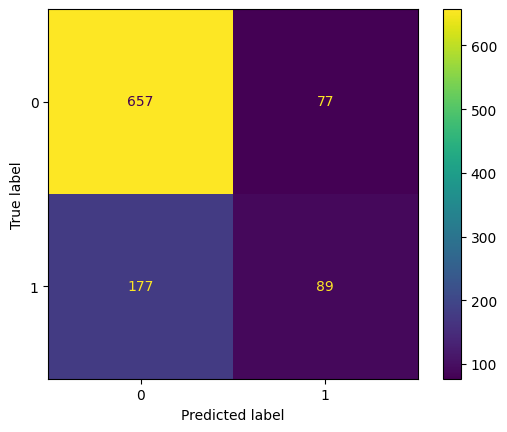

In [99]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [100]:
final_prediction_test = model_final.predict(last_test)
final_prediction_test = np.array([1 if x >= 0.5 else 0 for x in final_prediction_test])


num_correct = (final_prediction_test == y_test.to_numpy())
total = np.sum(num_correct == True)
total

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


np.int64(746)